<a href="https://colab.research.google.com/github/JAMILA09ALI/Deep-learning-techniques/blob/main/Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

In [ ]:
from PIL import Image
import os
from pathlib import Path

<IPython.core.display.Javascript object>

(480, 640)
Saved to Photo0.jpg


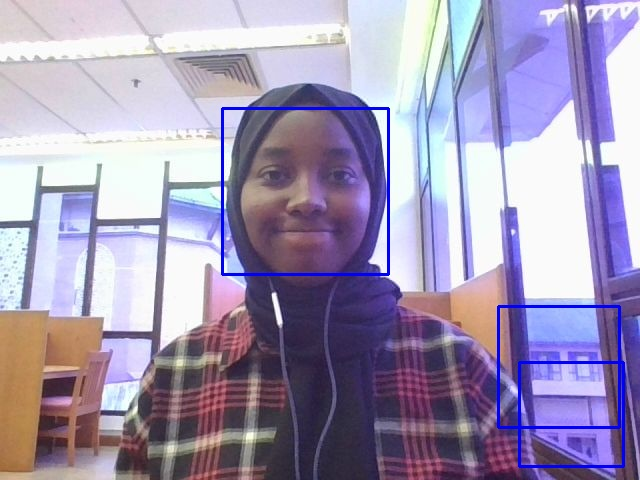

<IPython.core.display.Javascript object>

(480, 640)
Saved to Photo1.jpg


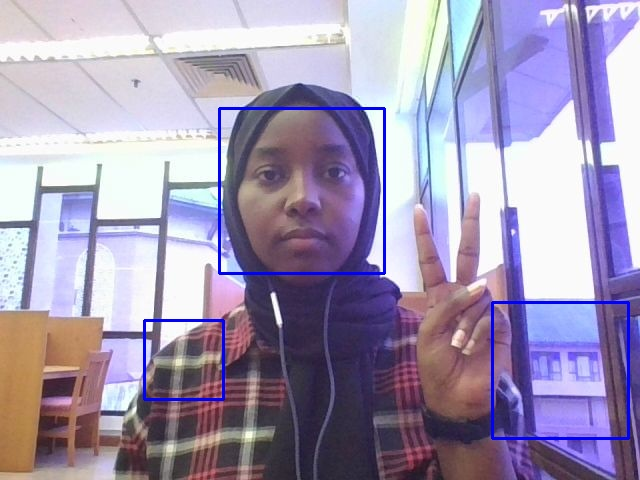

<IPython.core.display.Javascript object>

(480, 640)
Saved to Photo2.jpg


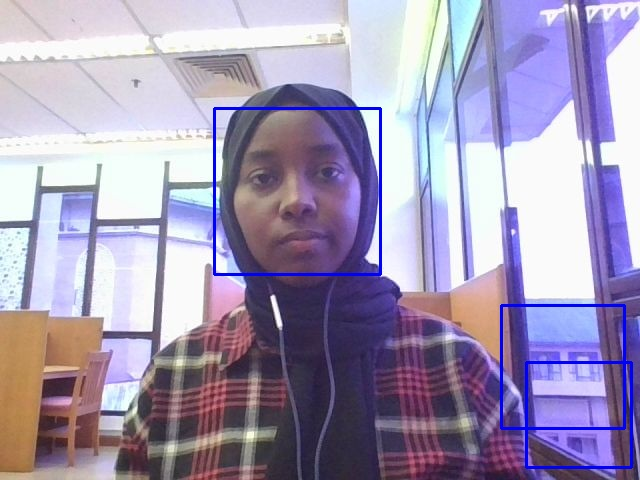

In [ ]:
from IPython.display import Image
n=0;
for n in range(3) :
  try:
     filename = take_photo('Photo' + str(n) + '.jpg')
     print('Saved to {}'.format(filename))

  # Show the image which was just taken.
     display(Image(filename))
  except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
    print(str(err))

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)
from IPython.display import Image

In [ ]:
path = "/content/gdrive/MyDrive/Assignment1_MV/"

# **A) Apply both Canny Edge Detection and Sobel Edge Detection to only the face area of the image using a suitable threshold values.**

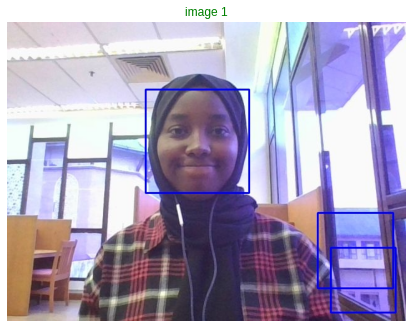

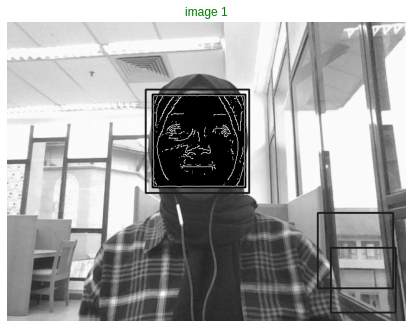

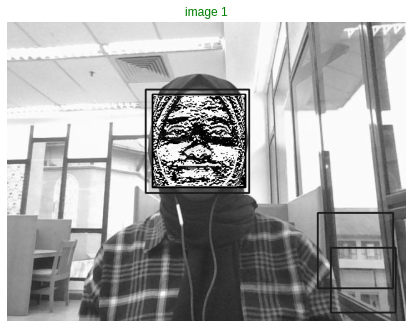

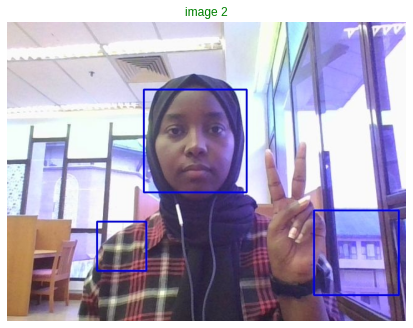

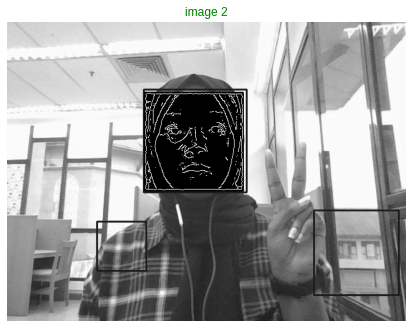

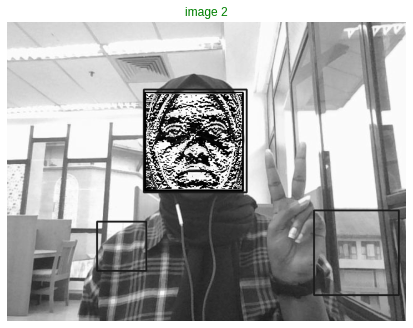

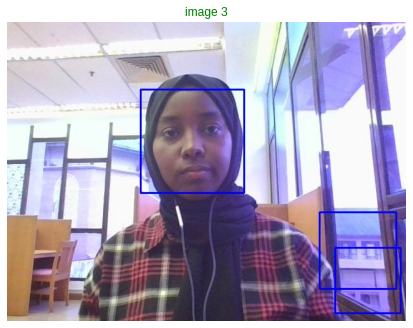

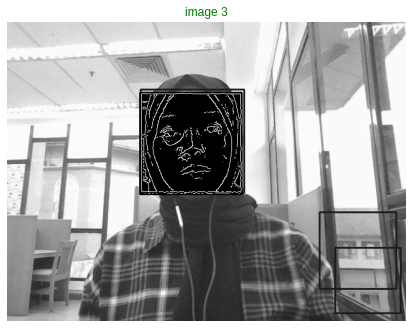

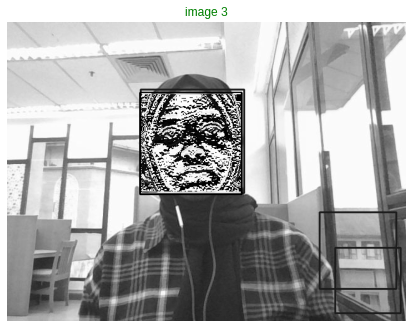

In [ ]:
# Importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import cv2 as cv


# A function for plotting the images

for n in range(3):  #NESTED FOR LOOP

  def plotImages(image): # To plot the images in sequence order
      plt.imshow(image, cmap="gray")
      plt.axis('off')
      plt.style.use('seaborn')
      plt.title('image '+ str(n+1), color='green')
      plt.show()

  # Reading the images using OpenCV
  img1 = cv2.imread('Photo' + str(n) + '.jpg')
  img2 = cv2.imread('Photo' + str(n) + '.jpg')
  img3 = cv2.imread('Photo' + str(n) + '.jpg')

  # Converting BGR image into a RGB image
  img1_RGB = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
  img2_RGB = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
  img3_RGB = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
  # Converting images to grayscale
  img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

  # plotting the original images
  plotImages(img1_RGB)
 # get face bounding box coordinates using Haar Cascade
  face_detection = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
  data  = face_detection.detectMultiScale(img1_RGB, 1.3, 5)

  # Draw a box around the faces
  for (x, y, w, h) in data:

      cv2.rectangle(img1_gray,(x,y),(x+w,y+h),(0,0,255),2) #image 2
      box1 = img1_gray[y:y+h, x:x+w]
      box1 = cv2.Canny(box1,80,80) # canny Edge Detection
      img1_gray[y:y+box1.shape[0], x:x+box1.shape[1]] = box1 # impose this on original image

      cv2.rectangle(img2_gray,(x,y),(x+w,y+h),(0,0,255),2) #image 3
      box2 = img2_gray[y:y+h, x:x+w]
      box2_blur = cv2.GaussianBlur(box2, (1,1), 0)
      box2 = cv2.Sobel(src=box2_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=1) # Sobel Edge Detection
      img2_gray[y:y+box2.shape[0], x:x+box2.shape[1]] = box2 # impose this on original image


  # plotting the results
  plotImages(img1_gray)
  plotImages(img2_gray)




# **B) Perform blurring of only faces in those images.**

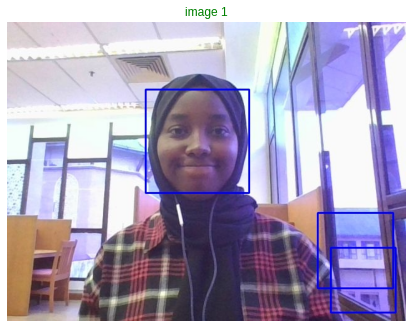

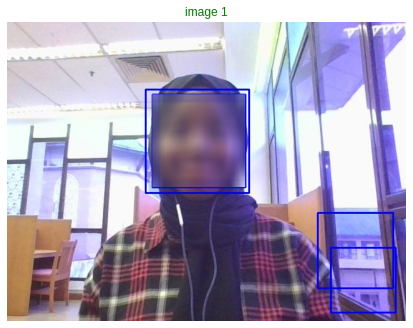

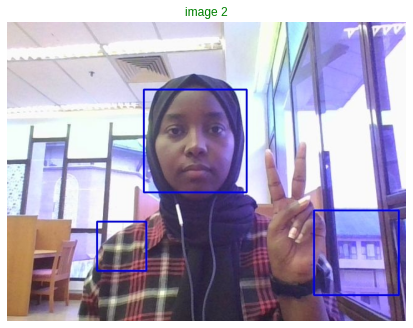

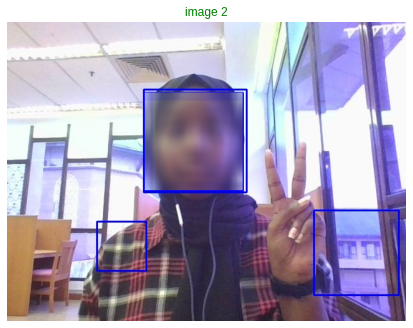

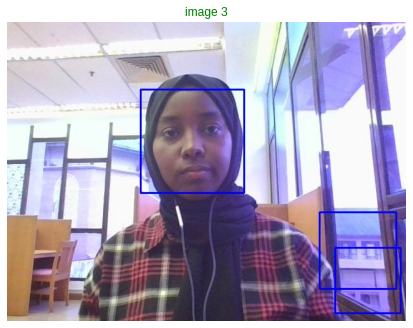

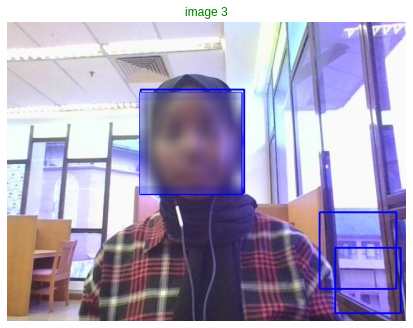

In [ ]:

# A function for plotting the images

for n in range(3):

  def plotImages(image): # To plot the images in sequence order
      plt.imshow(image, cmap="gray")
      plt.axis('off')
      plt.style.use('seaborn')
      plt.title('image '+str(n+1), color='green')
      plt.show()

  #Reading the images using OpenCV
  img1 = cv2.imread('Photo' + str(n) + '.jpg')
  img2 = cv2.imread('Photo' + str(n) + '.jpg')
  img3 = cv2.imread('Photo' + str(n) + '.jpg')

  # Converting BGR image into a RGB image
  img1_RGB = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
  img2_RGB = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
  img3_RGB = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

  # plotting the original images
  plotImages(img1_RGB)
 # get face bounding box coordinates using Haar Cascade
  face_detection = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
  data  = face_detection.detectMultiScale(img1_RGB, 1.3, 5)

  # Draw a box around the faces
  for (x, y, w, h) in data:

      cv2.rectangle(img3_RGB,(x,y),(x+w,y+h),(0,0,255),2) #image 1
      box3 = img3_RGB[y:y+h, x:x+w]
      box3 = cv2.GaussianBlur(box3, (25, 25), 30) #  gaussian blur over this new new box
      img3_RGB[y:y+box3.shape[0], x:x+box3.shape[1]] = box3 # impose this on original image





  plotImages(img3_RGB)




# **C) Calculating the number of coins in an image using contours.**

In [ ]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

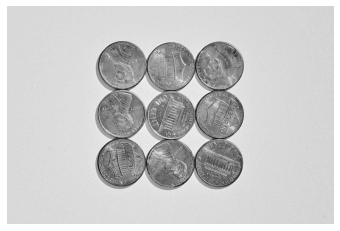

In [ ]:
image = cv2.imread(path +'coins1.jpg')
gray =  cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.axis('off')
plt.imshow(gray, cmap='gray')

(-0.5, 1499.5, 999.5, -0.5)

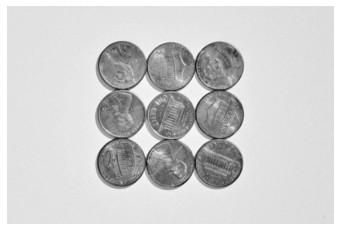

In [ ]:
blur = cv2.GaussianBlur(gray, (9, 9), 0)
plt.imshow(blur, cmap='gray')
plt.axis('off')

(-0.5, 1499.5, 999.5, -0.5)

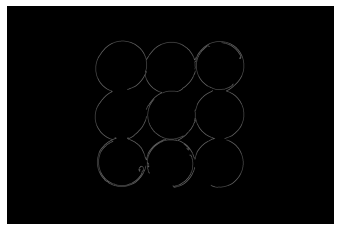

In [ ]:
canny = cv2.Canny(blur, 30, 350, 3)
plt.imshow(canny, cmap='gray')
plt.axis('off')

(-0.5, 1499.5, 999.5, -0.5)

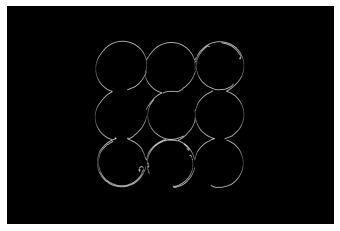

In [ ]:
dilated = cv2.dilate(canny, (1, 1), iterations=2)
plt.imshow(dilated, cmap='gray')
plt.axis('off')

(-0.5, 1499.5, 999.5, -0.5)

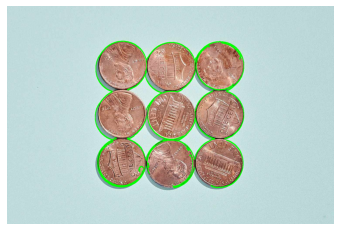

In [ ]:
(cnt, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

plt.imshow(rgb)
plt.axis('off')


In [ ]:
print("coins in the image : ", len(cnt))

coins in the image :  9
